In [38]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston



In [39]:
boston=load_boston()

In [40]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [41]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [42]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)

In [43]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


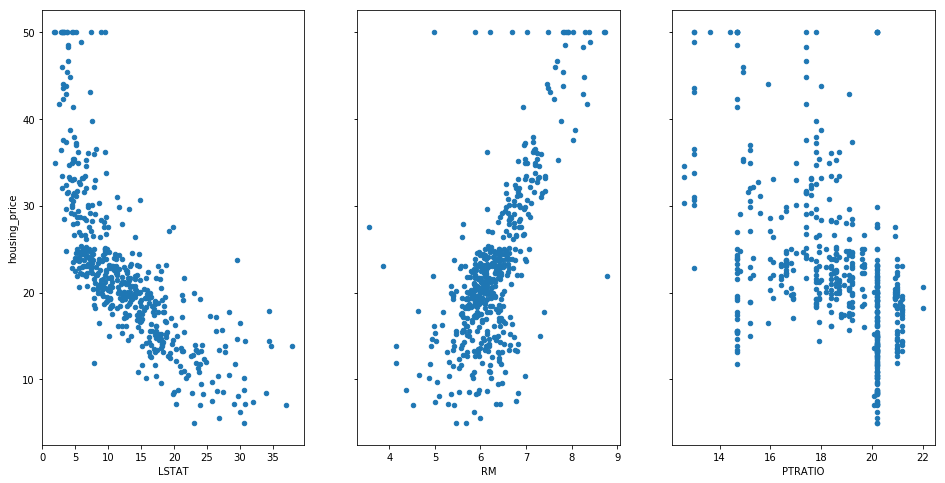

In [44]:
bos['housing_price']=boston.target
fig,axs=plt.subplots(1,3,sharey=True)
bos.plot(kind='scatter',x='LSTAT',y='housing_price',ax=axs[0],figsize=(16,8))
bos.plot(kind='scatter',x='RM',y='housing_price',ax=axs[1])
bos.plot(kind='scatter',x='PTRATIO',y='housing_price',ax=axs[2])
plt.show()

In [45]:
bos_house=pd.read_csv('C:/Users/Acer/housing.csv')

In [46]:
bos_house.shape

(489, 4)

In [47]:
bos_house.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [48]:
df_y=bos_house.MEDV

In [49]:
df_x=bos_house.drop('MEDV',axis=1)

In [50]:
df_x.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [51]:
df_x.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


In [52]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(df_x,df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
df_y.shape

(489,)

In [54]:
df_x.shape

(489, 3)

In [55]:
print(lm.coef_)

[ 86565.23613299 -10849.34038381 -19492.11563515]


In [20]:
print(lm.intercept_)

415464.396517


In [56]:
lm.residues_

D:\data_science\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


3767033768507.8262

In [57]:
import statsmodels.formula.api as smf

In [58]:
lm=smf.ols(formula='df_y~ df_x',data=bos_house).fit()

In [59]:
lm.summary
print(lm.conf_int)

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000000CE28208>>


In [60]:
lm.pvalues

Intercept    3.165352e-09
df_x[0]      3.562425e-25
df_x[1]      3.000609e-41
df_x[2]      5.944959e-20
dtype: float64

In [61]:
lm.conf_int()

,0,1
Intercept,280191.707499,550737.085534
df_x[0],71064.604769,102065.867497
df_x[1],-12287.894329,-9410.786439
df_x[2],-23498.572654,-15485.658616


In [62]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   df_y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          9.96e-133
Time:                        17:07:36   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.000     2.8e+05    5.51e+05
df_x[0]     8.657e+04   7888.895     10.973      0.000    7.11e+04    1.02e+05
df_x[1]    -1.085e+04    732.138    -14.819      0.000   -1.23e+04   -9410.786
df_x[2]    -1.949e+04   2039.047     -9.559      0.000   -2.35e+04   -1.55e+04
==============================================================================
Omnibus:                       57.976   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.413
Skew:                           0.772   Prob(JB):                     1.41e-20
Kurtosis:                       4.451   Cond. No.                         416.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [64]:
reg=linear_model.LinearRegression()

In [65]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
reg.coef_

array([ 92786.6687432 , -10039.26919194, -19469.45214502])

In [67]:
reg.intercept_

366817.34592575824

In [72]:
np.sum(np.square(reg.predict(X_test)-y_test))

652030714717.9092

In [77]:
from sklearn.linear_model import LinearRegression

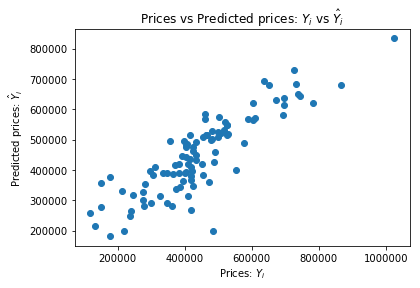

In [78]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [103]:
import sklearn
from sklearn.metrics import mean_squared_error
mse=sklearn.metrics.mean_squared_error(y_train,lm.predict(X_train))

In [104]:
import math
from math import sqrt
print(sqrt(mse))

89410.9141720701


In [92]:
df_x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
5,6.430,5.21,18.7
6,6.012,12.43,15.2
7,6.172,19.15,15.2
8,5.631,29.93,15.2
9,6.004,17.10,15.2


In [93]:
y_train[:5]

411    231000.0
334    367500.0
142    281400.0
120    462000.0
463    483000.0
Name: MEDV, dtype: float64

In [94]:
y_pred=reg.predict(X_train)[:5]

In [95]:
y_pred

array([ 332117.17911256,  453097.16682993,  312689.57088576,
        395344.25719037,  444887.04777005])

In [96]:
reg.predict(X_train).mean()

456709.71867007681

In [97]:
lm.predict(X_train).mean()

456709.71867007681

In [98]:
reg.predict(X_train).std()

140089.6828021351

In [99]:
reg.predict(X_train).max()

776814.3410104115

In [100]:
x=reg.predict(X_train)

In [90]:
z=np.asarray(y_test)

In [105]:
sqrt(3767033768507.8262)

1940884.7901170813

In [110]:
sqrt(reg.residues_)ape

D:\data_science\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


1767986.3758175136

In [119]:
from sklearn.metrics import r2_score

def performance_metric(y_train,x):
    score=r2_score(y_train,x,multioutput='variance_weighted')
    return score

score=performance_metric(y_train,x)
print(format(score))

0.7105548035810314


In [137]:
print(reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
